# Filter cells+positions+variants using thresholds

Saving as: 
1) NT pileup format for mgatk, similar to the input
2) Filtered af_by_cell matrix. This may not get used b/c we will call variants with mgatk later, but nice to have
3) Sparse matrices of Depth + allele frequency. These could be used for vireo. 

Create a function to convert between NT pileup and sparse matrices.

### Filter parameters

In [1]:
min_cells=100
min_reads=50
topn=0
min_het_cells=50
het_thresh=0.01
het_count_thresh = 50
bq_thresh=30



In [2]:
%matplotlib inline

In [3]:
import os
import time
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import main
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
#ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


import numpy as np

Project Directory: /data2/mito_lineage
fig_utils from mplh


In [4]:
from src.calculate_AF_by_cell import *
%load_ext autoreload
%autoreload 2

In [5]:
indir=join(RESULTS,"mttrace")
num_reads = 200
cellr="True"
in_prefix = f'jan21_2021'
j2 = "J2"
p2 = "P2"

j2_indir = join(indir, in_prefix, j2,"MT",f"cellr_{cellr}")
p2_indir = join(indir, in_prefix, p2,"MT",f"cellr_{cellr}")

concat_j2_dir = join(j2_indir,f"{j2}_{num_reads}")
concat_p2_dir = join(p2_indir,f"{p2}_{num_reads}")


In [6]:
from src.utils.parse_config import read_config_file
config = read_config_file(join(ROOT_DIR, "parameters/jan21_2021/mttrace_jan21_2021.yaml"))
mt_ref_fa = config['mt_ref_fa']
config

{'ref_fa': '/data2/mito_lineage/data/external/GRCh38_MT_blacklist/fasta/genome.fa',
 'mt_ref_fa': '/data2/mito_lineage/data/external/GRCh38_MT_blacklist/chrM.fasta',
 'samples': 'parameters/jan21_2021/jan21_2021.csv',
 'results': 'data/processed/mttrace/jan21_2021',
 'figures': 'figures/mttrace/jan21_2021',
 'main': ['mtscATAC'],
 'use_cellr_barcode': [True],
 'num_reads_filter': [200],
 'mito_character': 'chrM',
 'maxBP': 16571,
 'mapq': [0],
 'base_quality': 20,
 'filters': {'min_cells': [100],
  'min_reads': [50],
  'topN': [0],
  'het_thresh': [0.01],
  'min_het_cells': [10, 50],
  'het_count_thresh': [5, 50],
  'bq_thresh': [30]},
 'low_cov_thresh': 10}

## Run for J2

In [7]:
# scpileup_dir = concat_j2_dir
# af_f = join(scpileup_dir, f"filters/minC{min_cells}_minR{min_reads}_topN{topn}_hetT{het_thresh}_hetC{min_het_cells}_hetCount{het_counts_thresh}_bq{bq_thresh}/af_by_cell.tsv")
# af_f

af_f = join(ROOT_DIR, "data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC50_hetCount50_bq30/af_by_cell.tsv")
scpileup_dir = join(ROOT_DIR, "data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/")
name = "J2"

In [8]:
# main(scpileup_dir, af_f, mt_ref_fa, name="",
#                  min_cells=100, min_reads=100, topn=-1,
#                  het_thresh=0, min_het_cells=0, het_count_thresh=0,
#                  bq_thresh=0)

In [9]:
from src.calculate_AF_by_cell import *

In [10]:
af_f

'/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC50_hetCount50_bq30/af_by_cell.tsv'

In [11]:
af_by_cell = pd.read_csv(af_f,sep="\t", index_col=0)
dp_by_cell = pd.read_csv(af_f.replace(".tsv",".DP.tsv"), sep="\t", index_col=0)
ad_by_cell = pd.read_csv(af_f.replace(".tsv",".AD.tsv"), sep="\t", index_col=0)

af_by_cell

,10086G,10373A,10398G,10400T,10644A,10873C,11002G,11149A,11197T,11719A,...,8027A,8152A,8584A,8701G,8794T,8860G,9098C,9449T,9540C,9545G
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGAGCTCCC-1,0.083333,0.000000,1.000000,1.000000,1.000000,0.972973,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.031250,1.000000,1.000000,0.044444,0.952381,1.000000,0.000000,1.000000,1.000000
AAACGAAAGCGATACG-1,0.529412,0.197531,0.216216,0.000000,0.000000,0.154762,0.282258,0.000000,0.669492,1.000000,...,0.652632,0.825243,0.000000,0.354839,0.651515,0.982759,0.063830,0.163462,0.256410,0.000000
AAACGAAAGGCTTCGC-1,0.590909,0.410256,0.459459,0.000000,0.000000,0.432099,0.376147,0.000000,0.015873,0.369369,...,0.000000,0.000000,0.026316,0.365591,0.000000,0.346154,0.021505,0.229730,0.505882,0.024691
AAACGAAAGTACAACA-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.977528,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.051282,0.000000,0.000000,0.000000
AAACGAACAACGTACT-1,0.074627,0.080000,0.135135,0.000000,0.000000,0.033835,0.046512,0.000000,0.000000,0.038869,...,0.000000,0.000000,0.000000,0.036585,0.000000,0.029221,0.016598,0.130178,0.036585,0.007722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGAGTTAC-1,0.000000,0.000000,1.000000,1.000000,0.933333,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.962963,1.000000,0.000000,1.000000,1.000000
TTTGTGTTCGCATAAC-1,0.000000,0.000000,0.892857,0.928571,0.555556,0.481481,0.000000,0.400000,0.320000,1.000000,...,0.272727,0.325581,0.600000,0.620690,0.304348,1.000000,0.843750,0.000000,0.844444,0.812500
TTTGTGTTCGTGGTAT-1,0.000000,0.000000,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.939394,0.939394,...,0.947368,0.938776,0.000000,0.000000,0.888889,1.000000,0.000000,0.047619,0.057143,0.052632


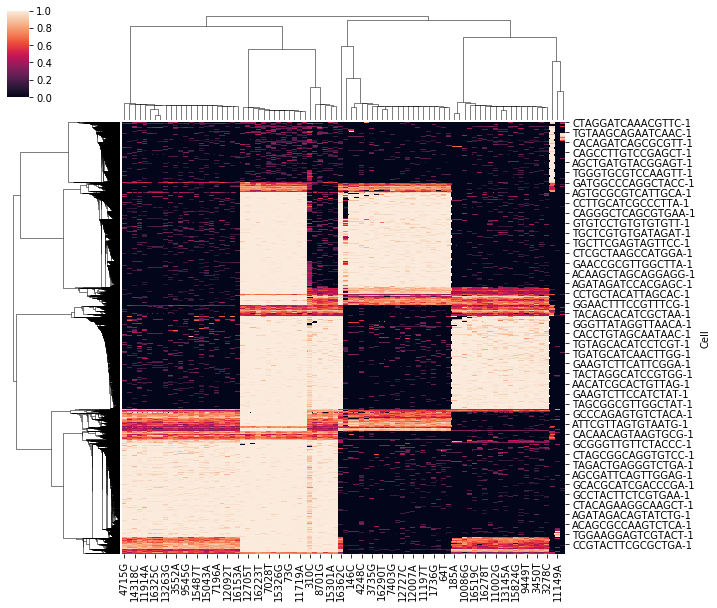

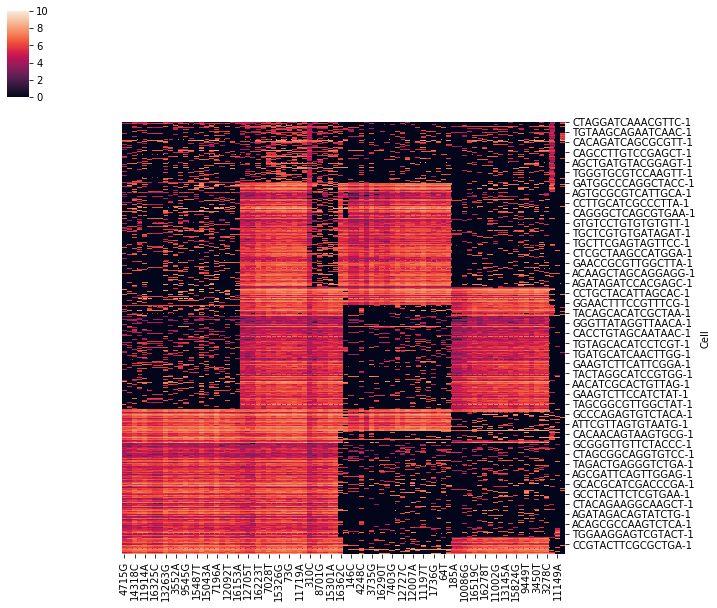

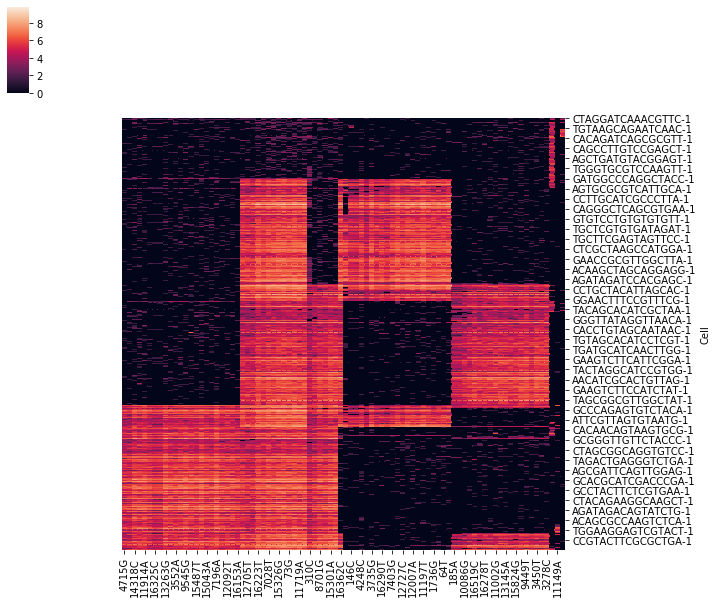

In [12]:
%matplotlib inline
g = sns.clustermap(np.sqrt(af_by_cell))
inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
sns.clustermap(np.log2(dp_by_cell.iloc[inds,cols]+1), row_cluster=False, col_cluster=False)
sns.clustermap(np.log2(ad_by_cell.iloc[inds,cols]+1), row_cluster=False, col_cluster=False)

In [12]:
final_cells = af_by_cell.index
final_positions = af_by_cell.columns  # list(map(lambda x: int(x[:-1]), af_by_cell.columns))
print("Number of positions", len(final_positions))
print("Positions:", final_positions)
print("Number of cells", len(final_cells))

Number of positions 86
Positions: Index(['10086G', '10373A', '10398G', '10400T', '10644A', '10873C', '11002G',
       '11149A', '11197T', '11719A', '11914A', '12007A', '12092T', '12160G',
       '12414C', '12705T', '12727C', '13105G', '13145A', '13263G', '13914A',
       '14318C', '1438G', '14560A', '146C', '14766T', '14783C', '15043A',
       '15244G', '15301A', '15311G', '15326G', '153G', '15487T', '15824G',
       '15930A', '16111T', '16124C', '16153A', '16189C', '16223T', '16278T',
       '16290T', '16298C', '16319A', '16325C', '16327T', '16362C', '16463G',
       '16519C', '1736G', '185A', '1888A', '189G', '235G', '263G', '2706G',
       '310C', '3278C', '3450T', '3552A', '3735G', '4248C', '4715G', '4769G',
       '4824G', '489C', '5773A', '6221C', '64T', '663G', '7028T', '7196A',
       '73G', '7403G', '750G', '8027A', '8152A', '8584A', '8701G', '8794T',
       '8860G', '9098C', '9449T', '9540C', '9545G'],
      dtype='object')
Number of cells 11175


In [13]:
# a.
# alleleDepth_by_cell.to_csv(AF_F.replace('.csv', '') + ".AD.csv")

print("Saving pileup")
# b. Save filtered nucleotide pileups for mgatk usage
final_positions = [int(x[:-1]) for x in final_positions]
final_positions

Saving pileup


[10086,
 10373,
 10398,
 10400,
 10644,
 10873,
 11002,
 11149,
 11197,
 11719,
 11914,
 12007,
 12092,
 12160,
 12414,
 12705,
 12727,
 13105,
 13145,
 13263,
 13914,
 14318,
 1438,
 14560,
 146,
 14766,
 14783,
 15043,
 15244,
 15301,
 15311,
 15326,
 153,
 15487,
 15824,
 15930,
 16111,
 16124,
 16153,
 16189,
 16223,
 16278,
 16290,
 16298,
 16319,
 16325,
 16327,
 16362,
 16463,
 16519,
 1736,
 185,
 1888,
 189,
 235,
 263,
 2706,
 310,
 3278,
 3450,
 3552,
 3735,
 4248,
 4715,
 4769,
 4824,
 489,
 5773,
 6221,
 64,
 663,
 7028,
 7196,
 73,
 7403,
 750,
 8027,
 8152,
 8584,
 8701,
 8794,
 8860,
 9098,
 9449,
 9540,
 9545]

In [14]:
out_d = os.path.dirname(af_f)

out_d

'/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC50_hetCount50_bq30'

In [15]:
import src.calculate_AF_by_cell as calcaf

In [26]:
nt_pileup = calcaf.load_and_filter_nt_pileups(scpileup_dir, final_cells,
                           np.array(final_positions),
                           out_d, name, incl_cov=True, avg_cov=False)


n
df    0                   1    2     3    4     5
0  1  AACATCGCAGCAGGTA-1  1.0  37.0  1.0  37.0
1  1  AACCTTTGTCTGTTGA-1  2.0  37.0  2.0  37.0
2  1  AACGAGGCAGAGAGAA-1  1.0  37.0  0.0   0.0
3  1  AATACGCGTATTCTCT-1  2.0  37.0  2.0  37.0
4  1  ACAAAGAAGGCGCTTC-1  1.0  37.0  1.0  25.0
0      int64
1     object
2    float64
3    float64
4    float64
5    float64
dtype: object
Before filt (62172047, 7)
   Position                Cell  Fw Coverage  Fw BQ  Rev Coverage  Rev BQ  \
0         1  AACATCGCAGCAGGTA-1            1   37.0             1    37.0   
1         1  AACCTTTGTCTGTTGA-1            2   37.0             2    37.0   
2         1  AACGAGGCAGAGAGAA-1            1   37.0             0     0.0   
3         1  AATACGCGTATTCTCT-1            2   37.0             2    37.0   
4         1  ACAAAGAAGGCGCTTC-1            1   37.0             1    25.0   

     BQ  
0  37.0  
1  37.0  
2  37.0  
3  37.0  
4  31.0  
After filt (355808, 7)
        Position                Cell  Fw Coverage

In [24]:
nt_pileup["A"]["Fw Coverage"].astype(int) + nt_pileup["A"]["Rev Coverage"].astype(int)

169669      1
169670      1
169671      2
169672      1
169673      1
           ..
61944147    1
61944148    4
61944149    1
61944150    1
61944151    2
Length: 355808, dtype: int64

# Run pipeline from src

In [10]:
run_filters(scpileup_dir, af_f, mt_ref_fa, name=name,
                 min_cells=min_cells, min_reads=min_reads, topn=topn,
                 het_thresh=het_thresh, min_het_cells=min_het_cells, het_count_thresh=het_count_thresh,
                 bq_thresh=bq_thresh)

['/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/P2.coverage.strands.txt.gz']
   0                   1     2
0  2  AAACGAAAGAGGTCCA-1  21.5
1  3  AAACGAAAGAGGTCCA-1  26.0
2  4  AAACGAAAGAGGTCCA-1  25.5
3  5  AAACGAAAGAGGTCCA-1  25.5
4  6  AAACGAAAGAGGTCCA-1  25.5
sc_cov    Position                Cell  Coverage
0         2  AAACGAAAGAGGTCCA-1      21.5
1         3  AAACGAAAGAGGTCCA-1      26.0
2         4  AAACGAAAGAGGTCCA-1      25.5
3         5  AAACGAAAGAGGTCCA-1      25.5
4         6  AAACGAAAGAGGTCCA-1      25.5
                     # Cells # Positions # Variants
Initial 10x barcodes    6850       16569          0
Filtering cells
topN 0
top Cell
TTGAGTGGTGGCCTTG-1    25988536.0
TTGACGAAGTAACACA-1    10332344.0
CTCTACGTCCGTCAAA-1    10241930.0
GTGGCGTTCACTAGCA-1     8471014.0
GCTGCGAGTCTCTGGG-1     7256687.5
                         ...    
TTACCGCCAATGTGTC-1        9936.5
TTAACGGCAGTTCGGC-1        9622.5
TTCGCGTCAGTGCGTC-1        9043.0
GGGTTATTCTATT

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Saving heatmap
